In [1]:
import pandas as pd

In [2]:
# load dataset
df = pd.read_csv("digit.dat", delimiter=';', dtype=str)

In [3]:
# drop duplicate columns
df.drop(columns=["A2", "B2", "C2", "D2", "E2", "F2", "G2", "H2"], inplace=True)

In [4]:
# view data
df.head()

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


In [5]:
df.replace({'ZERO': 0, 'ONE': 1}, regex=True, inplace=True)
df.replace(
    {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'zero': 0
    }, 
    regex=True, 
    inplace=True
)

C:\Users\aster\AppData\Local\Temp\ipykernel_8020\172046838.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'ZERO': 0, 'ONE': 1}, regex=True, inplace=True)
C:\Users\aster\AppData\Local\Temp\ipykernel_8020\172046838.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(


In [6]:
# save features as df
features = df.loc[:, "B":"H"]

In [7]:
# save target as df
target = df[["A"]]

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [9]:
link = linkage(features, 'ward', 'euclidean')
link.shape

(499, 4)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [112.5, 112.5, 142.5, 142.5],
  [71.25, 71.25, 127.5, 127.5],
  [21.25, 21.25, 99.375, 99.375],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [242.5, 242.5, 273.75, 273.75],
  [210.0, 210.0, 258.125, 258.125],
  [172.5, 172.5, 234.0625, 234.0625],
  [60.3125, 60.3125, 203.28125, 203.28125]],
 'dcoord': [[0.0,
   np.float64(3.1224989991991983),
   np.float64(3.

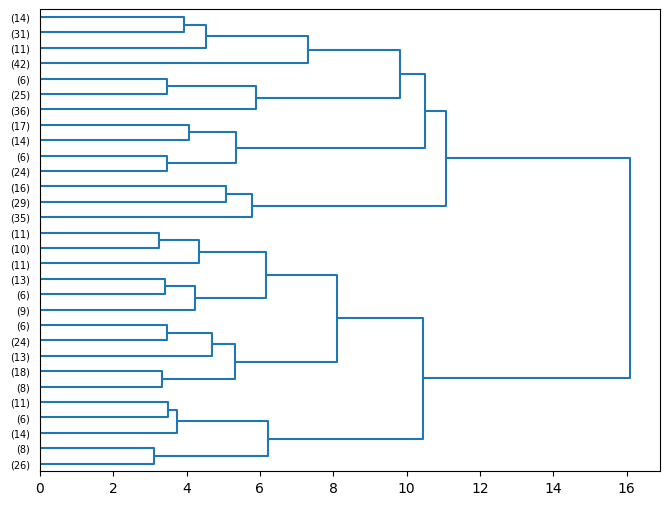

In [10]:
from matplotlib import pyplot as plt

# plot dendrogram
fig1 = plt.figure(figsize=(8, 6))
dendrogram(link,
            labels=features.index.tolist(),
            leaf_font_size = 7, 
            truncate_mode='lastp',
            color_threshold=-1,
            orientation = "right",
            leaf_rotation=0.
)

Text(0, 0.5, 'Distance')

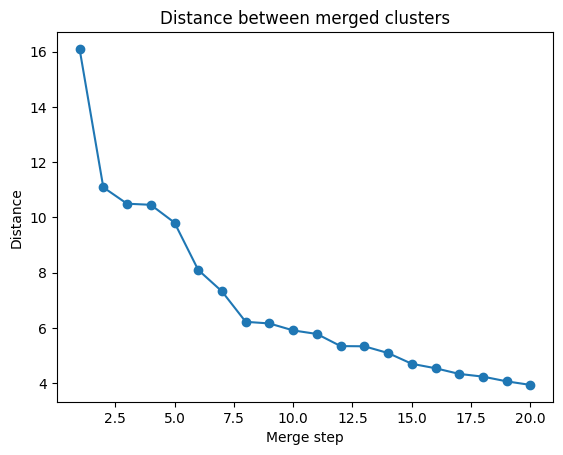

In [12]:
dist_rev = link[:, 2][::-1][:20]
idxs = range(1, 21)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Merge step')
plt.ylabel('Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [112.5, 112.5, 142.5, 142.5],
  [71.25, 71.25, 127.5, 127.5],
  [21.25, 21.25, 99.375, 99.375],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [242.5, 242.5, 273.75, 273.75],
  [210.0, 210.0, 258.125, 258.125],
  [172.5, 172.5, 234.0625, 234.0625],
  [60.3125, 60.3125, 203.28125, 203.28125]],
 'dcoord': [[0.0,
   np.float64(3.1224989991991983),
   np.float64(3.

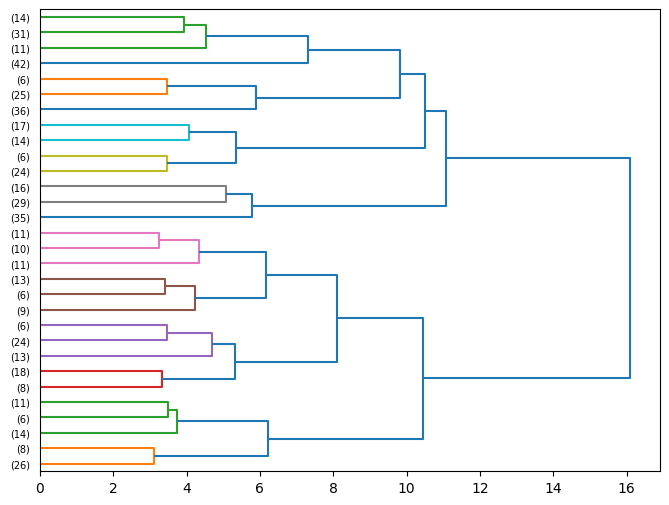

In [13]:
fig2 = plt.figure(figsize=(8, 6))
dendrogram(link,
            labels=features.index.tolist(),
            leaf_font_size = 7, 
            truncate_mode='lastp',
            color_threshold=5.3,
            orientation = "right",
            leaf_rotation=0.
)

In [14]:
df['cluster'] = fcluster(link, 5.3, criterion='distance')

In [15]:
df.groupby('cluster').mean()

,A,B,C,D,E,F,G,H
cluster,,,,,,,,
1,3.705882,0.029412,0.852941,1.000000,1.000000,0.000000,0.852941,0.000000
2,5.129032,0.000000,0.967742,0.548387,0.903226,0.548387,0.967742,0.806452
3,1.692308,0.000000,0.000000,1.000000,0.000000,0.307692,1.000000,0.000000
4,5.651163,0.813953,0.302326,1.000000,0.000000,0.000000,0.860465,0.093023
5,5.214286,0.785714,0.678571,0.000000,0.428571,0.428571,0.964286,0.214286
6,5.125000,1.000000,0.531250,1.000000,0.812500,0.343750,1.000000,0.000000
7,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
8,5.644444,1.000000,0.644444,0.000000,1.000000,0.844444,0.911111,1.000000
9,2.300000,0.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.900000


In [16]:
# show what numbers are in each cluster
for i in range(1, df['cluster'].max()+1):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['A'].value_counts())
    print()

Cluster 1:
A
4    30
1     3
3     1
Name: count, dtype: int64

Cluster 2:
A
4    10
8     5
5     5
6     4
9     3
0     3
3     1
Name: count, dtype: int64

Cluster 3:
A
1    23
7     3
Name: count, dtype: int64

Cluster 4:
A
7    32
1     6
0     3
9     1
4     1
Name: count, dtype: int64

Cluster 5:
A
6    9
7    6
5    5
4    3
1    2
3    1
8    1
0    1
Name: count, dtype: int64

Cluster 6:
A
3    7
8    5
7    5
9    5
4    4
0    3
1    2
5    1
Name: count, dtype: int64

Cluster 7:
A
5    30
9     3
6     2
Name: count, dtype: int64

Cluster 8:
A
6    30
2     5
9     3
5     3
3     2
8     2
Name: count, dtype: int64

Cluster 9:
A
2    26
4     2
9     1
0     1
Name: count, dtype: int64

Cluster 10:
A
2    9
8    6
6    4
9    4
5    4
3    2
4    1
1    1
Name: count, dtype: int64

Cluster 11:
A
8    31
0     2
6     1
5     1
9     1
Name: count, dtype: int64

Cluster 12:
A
0    24
2     3
8     2
3     1
7     1
Name: count, dtype: int64

Cluster 13:
A
9    27
5     5

Cluster 1: number 4
 
Cluster 2: noisy cluster, mostly number 4 and numbers with incorrect features (missing top line)

Cluster 3: number 1

Cluster 4: number 7

Cluster 5: noisy cluster, numbers with lower right vertical and top horizontal

Cluster 6: noisy cluster, numbers with right and top lines

Cluster 7: number 5

Cluster 8: number 6

Cluster 9: number 2

Cluster 10: noisy cluster, numbers with middle horizontal

Cluster 11: number 8

Cluster 12: number 0

Cluster 13: number 9

Cluster 14: number 3